In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
df = pd.read_csv('~/MITM-Detection/dataset.csv')

In [23]:

# Display the first few rows of the DataFrame
print(df.head())

# Extract features and labels
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Labels (last column)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape dữ liệu để phù hợp với đầu vào của Conv1D
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

           0  6.666666667  0.1  0.2  0.3
0   8.000000    61.666667   24    0    0
1  18.000000    43.333333   54    0    0
2  23.666667    41.333333   71    0    0
3  37.666667    38.333333   91    0    0
4  52.333333    25.000000   95    0    0


In [24]:
# model = Sequential()
# model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(1, activation='sigmoid'))

In [25]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test, y_test))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Huấn luyện mô hình
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

Epoch 1/100


118/118 - 7s - loss: 2.3201 - accuracy: 0.6554 - val_loss: 0.7964 - val_accuracy: 0.6649 - 7s/epoch - 57ms/step
Epoch 2/100
118/118 - 1s - loss: 0.6676 - accuracy: 0.6573 - val_loss: 0.5870 - val_accuracy: 0.6766 - 1s/epoch - 10ms/step
Epoch 3/100
118/118 - 1s - loss: 0.5355 - accuracy: 0.7714 - val_loss: 0.4830 - val_accuracy: 0.8240 - 957ms/epoch - 8ms/step
Epoch 4/100
118/118 - 1s - loss: 0.4573 - accuracy: 0.8316 - val_loss: 0.4079 - val_accuracy: 0.8494 - 1s/epoch - 12ms/step
Epoch 5/100
118/118 - 1s - loss: 0.3785 - accuracy: 0.8552 - val_loss: 0.4034 - val_accuracy: 0.8802 - 1s/epoch - 9ms/step
Epoch 6/100
118/118 - 1s - loss: 0.2864 - accuracy: 0.9207 - val_loss: 0.2431 - val_accuracy: 0.9459 - 934ms/epoch - 8ms/step
Epoch 7/100
118/118 - 1s - loss: 0.2425 - accuracy: 0.9602 - val_loss: 0.2781 - val_accuracy: 0.9777 - 1s/epoch - 9ms/step
Epoch 8/100
118/118 - 1s - loss: 0.2409 - accuracy: 0.9695 - val_loss: 0.2430 - val_accuracy: 0.9777 - 1s/epoch - 11ms/step
Epoch 9/100
118/11

In [26]:
# Tính confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[627   0]
 [ 20 296]]


In [27]:
#Get the evaluation metrics like precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       627
           1       1.00      0.94      0.97       316

    accuracy                           0.98       943
   macro avg       0.98      0.97      0.98       943
weighted avg       0.98      0.98      0.98       943



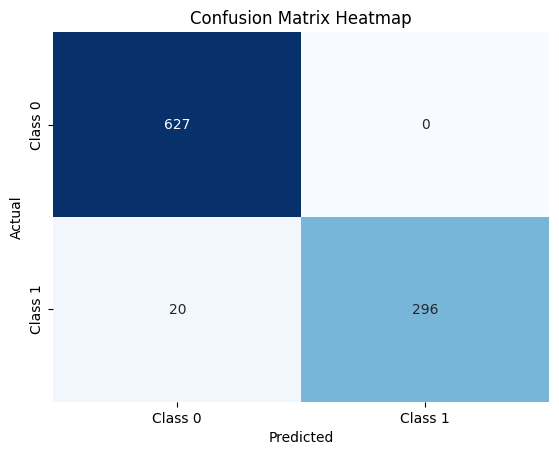

In [28]:
# Hiển thị heatmap cho confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()